In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Statement

Principal Component Analysis

In [404]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Q1. Load the Data file into Python DataFrame and view top 10 rows

In [427]:
pca_df=pd.read_csv("breast-cancer-wisconsin-data.csv")

In [428]:
pca_df.head(5)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [429]:
pca_df.shape

(699, 11)

In [430]:
pca_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [431]:
pca_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


## Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [433]:
pca_df.duplicated().value_counts()

False    691
True       8
dtype: int64

In [435]:
pca_df.drop_duplicates(inplace=True)

In [436]:
pca_df.drop('ID', axis=1, inplace=True)

In [437]:
pca_df.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [438]:
pca_df['Bare Nuclei'].value_counts()

1     397
10    130
2      30
5      30
3      28
8      20
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [439]:
#pca_df=pca_df.convert_objects(convert_numeric=True)

In [440]:
pca_df['Bare Nuclei']=pca_df['Bare Nuclei'].replace(to_replace='?', value='1')

In [441]:
pca_df['Bare Nuclei'].value_counts()

1     413
10    130
2      30
5      30
3      28
8      20
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [442]:
pca_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ClumpThickness,691,NaN,NaN,NaN,4.42692,2.81586,1,2,4,6,10
Cell Size,691,NaN,NaN,NaN,3.13025,3.04133,1,1,1,5,10
Cell Shape,691,NaN,NaN,NaN,3.20116,2.95989,1,1,1,5,10
Marginal Adhesion,691,NaN,NaN,NaN,2.82489,2.86655,1,1,1,4,10
Single Epithelial Cell Size,691,NaN,NaN,NaN,3.21129,2.19985,1,2,2,4,10
Bare Nuclei,691,10,1,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,691,NaN,NaN,NaN,3.4356,2.44235,1,2,3,5,10
Bland Chromatin,691,NaN,NaN,NaN,2.88278,3.0663,1,1,1,4,10
Mitoses,691,NaN,NaN,NaN,1.59334,1.72313,1,1,1,1,10
Class,691,NaN,NaN,NaN,2.68886,0.951051,2,2,2,4,4


In [443]:
pca_df=pca_df.convert_objects(convert_numeric=True)

C:\Users\neeha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [444]:
pca_df.dtypes

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

## Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [445]:
pca_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643340,0.653752,0.487949,0.517448,0.590841,0.561076,0.535712,0.350354,0.716938
Cell Size,0.643340,1.000000,0.905420,0.713117,0.747111,0.684791,0.759525,0.727239,0.460064,0.817720
Cell Shape,0.653752,0.905420,1.000000,0.690989,0.714393,0.704382,0.738455,0.724693,0.440592,0.817693
Marginal Adhesion,0.487949,0.713117,0.690989,1.000000,0.608477,0.672719,0.669813,0.602453,0.417167,0.701371
Single Epithelial Cell Size,0.517448,0.747111,0.714393,0.608477,1.000000,0.580709,0.620518,0.634058,0.482644,0.681233
Bare Nuclei,0.590841,0.684791,0.704382,0.672719,0.580709,1.000000,0.672687,0.578417,0.343020,0.816787
Normal Nucleoli,0.561076,0.759525,0.738455,0.669813,0.620518,0.672687,1.000000,0.669059,0.343821,0.756618
Bland Chromatin,0.535712,0.727239,0.724693,0.602453,0.634058,0.578417,0.669059,1.000000,0.427644,0.715540
Mitoses,0.350354,0.460064,0.440592,0.417167,0.482644,0.343020,0.343821,0.427644,1.000000,0.424111
Class,0.716938,0.817720,0.817693,0.701371,0.681233,0.816787,0.756618,0.715540,0.424111,1.000000


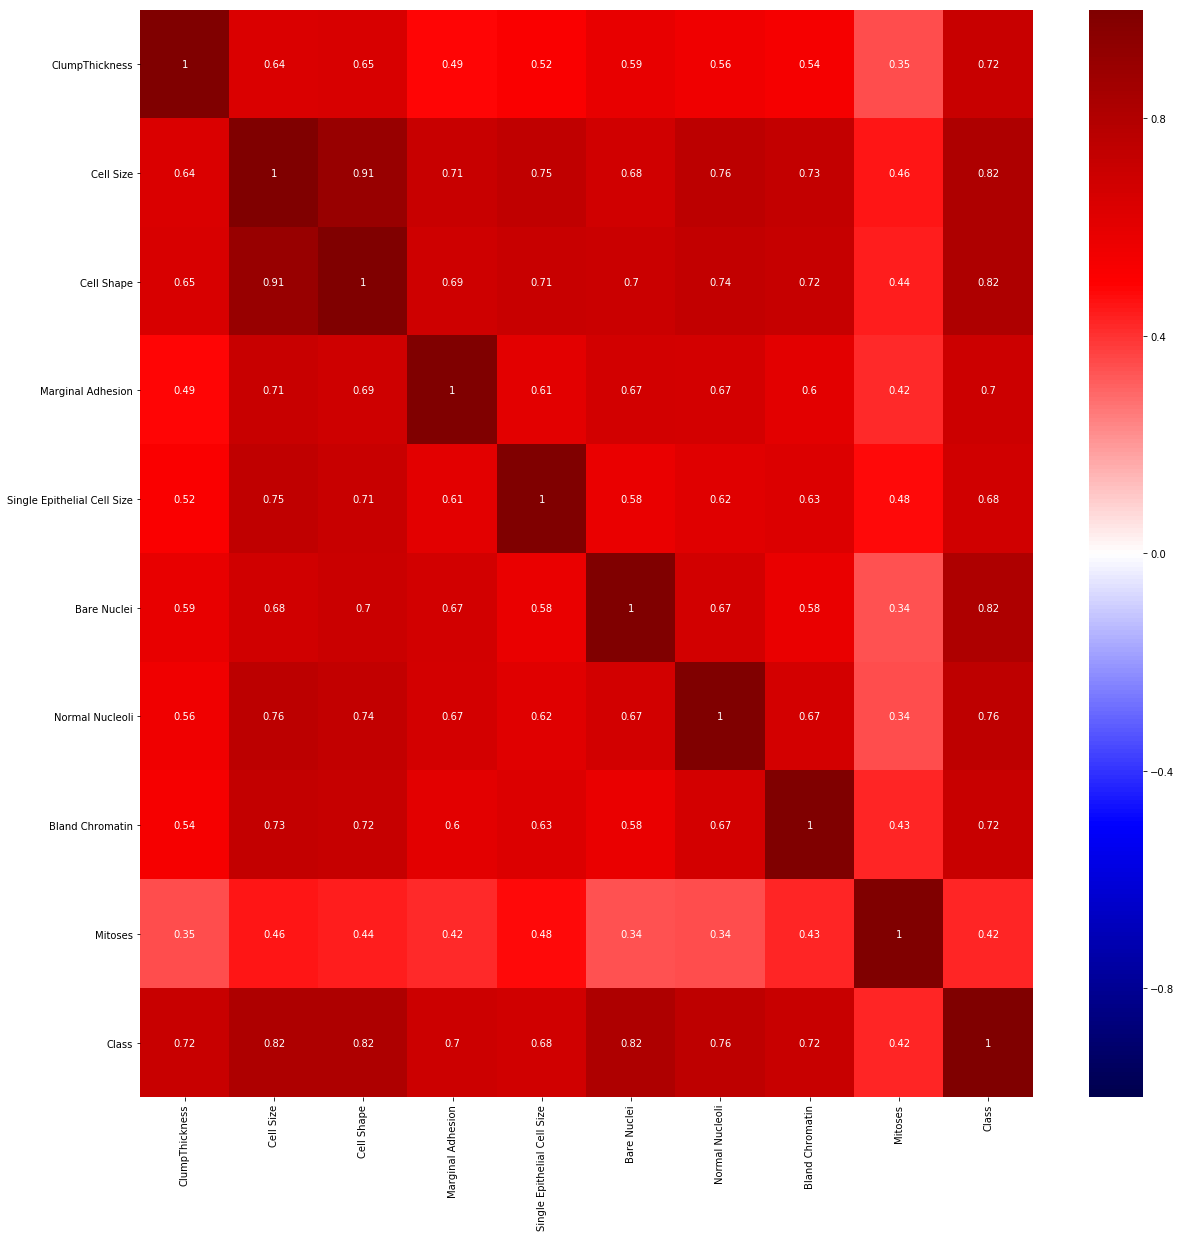

In [446]:
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(pca_df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

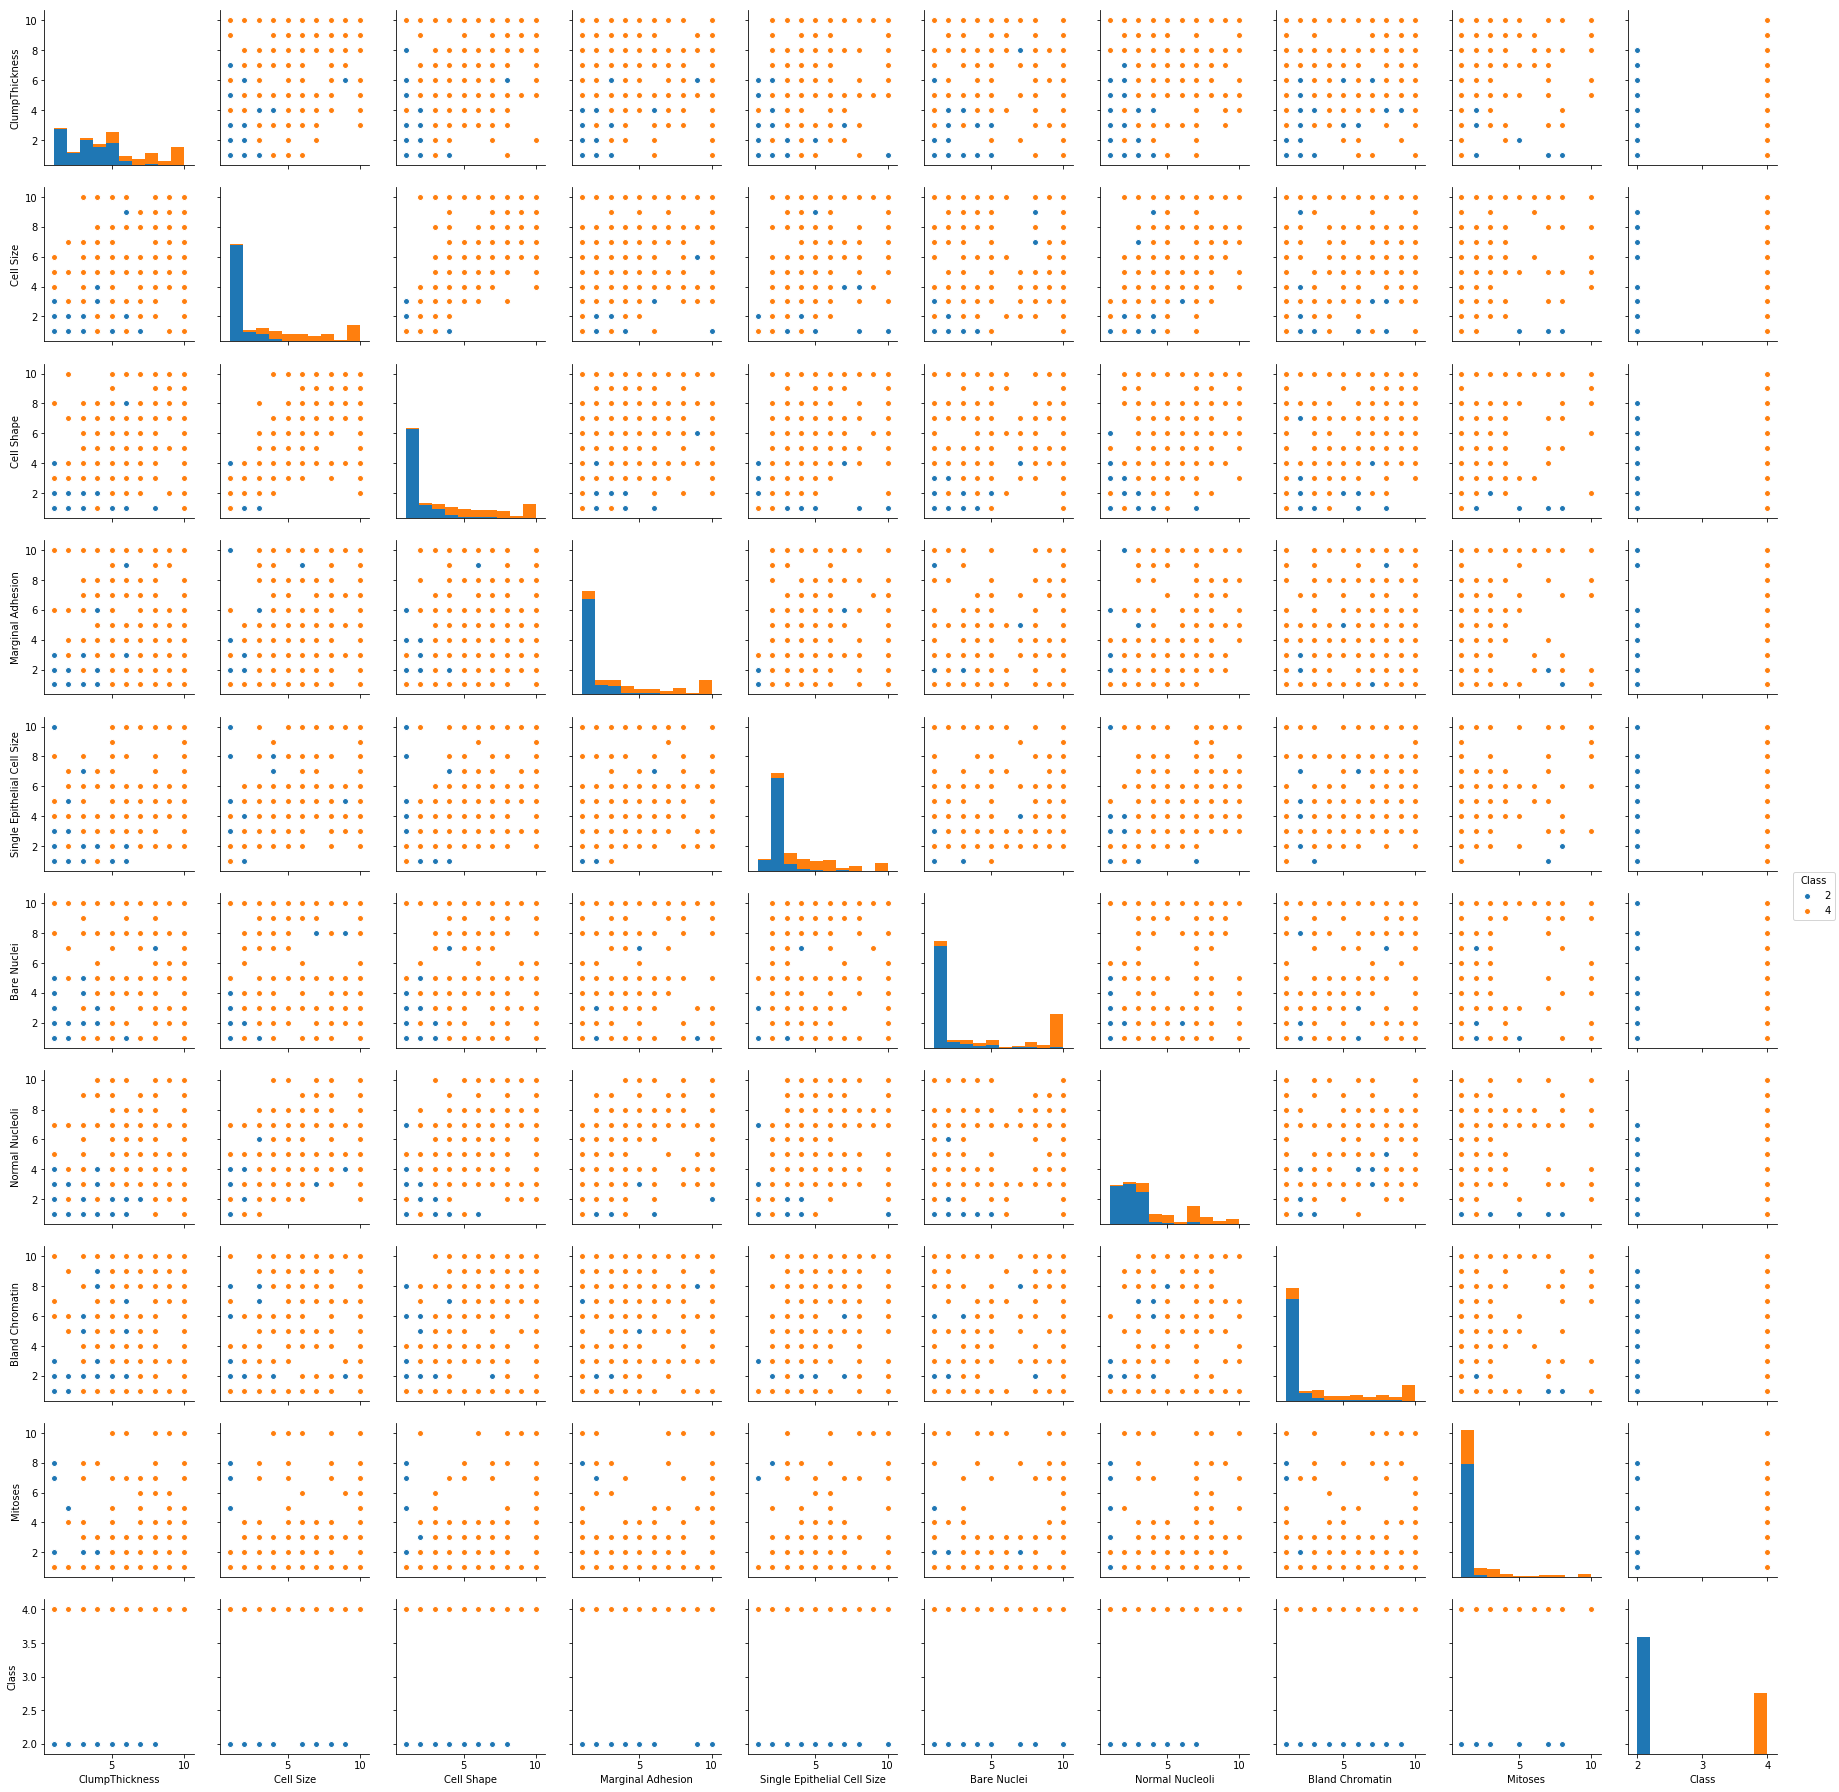

In [447]:
sns.pairplot(pca_df, hue='Class')

#Inferences

1) Cell Shape, Cell Size, Bare Nuclei have a Very High Correlation with Class. Increase in either of them will also lead to increase in the Class 

2) ClumpThickness,Marginal Adhesion, Normal Nucleoli and Bland Chromatin also are highly correlated with Class, Again increase in any of them will lead to a increase in class

3) Cell size and Cell shape also are very highly +vely correlated

4) None of the Variables have any negative correlation so increase in any of them will not reduce the other

5) Mitosis seems to have the least + ve correlation with Class.

## Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [448]:
pca_df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

ClumpThickness                    AxesSubplot(0.125,0.749828;0.168478x0.130172)
Cell Size                      AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Cell Shape                     AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Marginal Adhesion              AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Single Epithelial Cell Size       AxesSubplot(0.125,0.593621;0.168478x0.130172)
Bare Nuclei                    AxesSubplot(0.327174,0.593621;0.168478x0.130172)
Normal Nucleoli                AxesSubplot(0.529348,0.593621;0.168478x0.130172)
Bland Chromatin                AxesSubplot(0.731522,0.593621;0.168478x0.130172)
Mitoses                           AxesSubplot(0.125,0.437414;0.168478x0.130172)
dtype: object

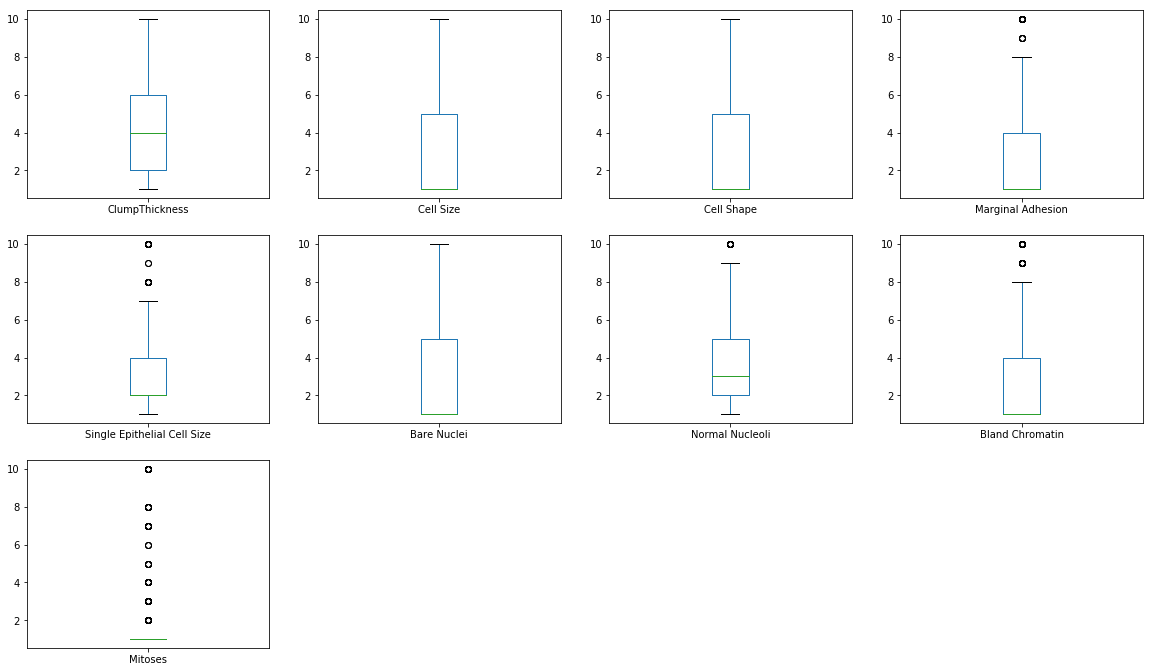

In [449]:
pca_df[['ClumpThickness','Cell Size','Cell Shape','Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses']].plot(kind='box',subplots=True,layout=(5,4),figsize=(20,20))

1) After observing box plots we observe outliers in the below 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Normal Nucleoli', 'Bland Chromatin' & 'Mitoses' but as we do not know the impact of removing these values we will keep them in the data set as is

2) We have dropped ID column is above step as it does not add value to the dataset

In [450]:
X=pca_df[['ClumpThickness','Cell Size','Cell Shape','Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses']]
y=pca_df[['Class']]


In [451]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Trans=scaler.fit_transform(X)

## Q6 Create a covariance matrix for identifying Principal components

In [452]:
cov_matrix = np.cov(X_Trans.T) #Multiplying X with its Transform gives Covariance matrix
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.00144928 0.64427196 0.65469961 0.48865637 0.51819771 0.59169728
  0.56188952 0.53648819 0.35086138]
 [0.64427196 1.00144928 0.90673173 0.71415051 0.74819397 0.68578334
  0.760626   0.72829333 0.46073106]
 [0.65469961 0.90673173 1.00144928 0.69199047 0.71542879 0.7054026
  0.73952487 0.72574349 0.44123095]
 [0.48865637 0.71415051 0.69199047 1.00144928 0.60935911 0.67369366
  0.67078345 0.6033266  0.41777184]
 [0.51819771 0.74819397 0.71542879 0.60935911 1.00144928 0.58155073
  0.62141694 0.63497707 0.48334351]
 [0.59169728 0.68578334 0.7054026  0.67369366 0.58155073 1.00144928
  0.67366165 0.57925498 0.34351675]
 [0.56188952 0.760626   0.73952487 0.67078345 0.62141694 0.67366165
  1.00144928 0.67002891 0.34431924]
 [0.53648819 0.72829333 0.72574349 0.6033266  0.63497707 0.57925498
  0.67002891 1.00144928 0.42826329]
 [0.35086138 0.46073106 0.44123095 0.41777184 0.48334351 0.34351675
  0.34431924 0.42826329 1.00144928]]


## Q7 Identify eigen values and eigen vector

In [453]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [454]:
print('Eigen Vectors \n%s', eig_vecs)#apply eigen function -internally uses Decomposition, breaks covariance 2 matrices eigen values and eigen Vectors
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.30205422  0.14897227 -0.86876767 -0.00255044 -0.02886788  0.26683317
  -0.19324853 -0.14973061 -0.00303072]
 [-0.38087763  0.04836887  0.03660386 -0.73666757  0.1895303  -0.44033376
  -0.23370998  0.09452526  0.12329959]
 [-0.3772005   0.08333656 -0.02037545  0.66434556  0.16758725 -0.58989507
  -0.15107072  0.06055041  0.08033821]
 [-0.33432944  0.05023264  0.39016444  0.04590585 -0.48698947  0.19616967
  -0.4894843  -0.46460377 -0.01649364]
 [-0.33590135 -0.1737774   0.15769698  0.06655255  0.32869726  0.39056782
   0.2106072  -0.06514068  0.72006271]
 [-0.33287375  0.2470288  -0.02956386 -0.07104864 -0.55678398 -0.15832954
   0.69557935  0.0163597   0.05545258]
 [-0.34640353  0.22999253  0.18339467  0.06246875  0.00969919  0.39437394
  -0.13201328  0.73915875 -0.26488494]
 [-0.33648572 -0.02063119  0.13579984 -0.02017884  0.47669866  0.11577424
   0.31537662 -0.40981256 -0.59954057]
 [-0.22975288 -0.90634176 -0.11593909  0.00808282 -0.22937896 -0.04360687
   0

##  Q8 Find variance and cumulative variance by each eigen vector

In [455]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [456]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 65.56656208  74.18615308  80.18441065  85.35621906  89.46893543
  92.8164231   96.07406488  98.99695992 100.        ]


## Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [457]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)

In [458]:
pca.fit_transform(X_Trans)

array([[-1.46040038, -0.11262152, -0.57883341, ...,  0.22282532,
         0.23874164, -0.44393941],
       [ 1.46803537, -0.52838595,  0.31082771, ..., -1.02434319,
        -0.49647471, -0.2166342 ],
       [-1.5829628 , -0.07510658,  0.03048409, ..., -0.10704944,
         0.34969464, -0.21045908],
       ...,
       [ 3.82845289, -0.17021365,  0.78956831, ...,  0.18290696,
         0.65110776,  0.59465559],
       [ 2.26914467, -1.11662744,  0.98320288, ...,  0.65111478,
         1.56069742,  0.09059963],
       [ 2.66622144, -1.19330064,  1.08054786, ...,  0.84167801,
         1.68183603,  0.36271669]])

In [459]:
pca.components_

array([[ 0.30205422,  0.38087763,  0.3772005 ,  0.33432944,  0.33590135,
         0.33287375,  0.34640353,  0.33648572,  0.22975288],
       [-0.14897227, -0.04836887, -0.08333656, -0.05023264,  0.1737774 ,
        -0.2470288 , -0.22999253,  0.02063119,  0.90634176],
       [-0.86876767,  0.03660386, -0.02037545,  0.39016444,  0.15769698,
        -0.02956386,  0.18339467,  0.13579984, -0.11593909],
       [-0.02886788,  0.1895303 ,  0.16758725, -0.48698947,  0.32869726,
        -0.55678398,  0.00969919,  0.47669866, -0.22937896],
       [-0.00303072,  0.12329959,  0.08033821, -0.01649364,  0.72006271,
         0.05545258, -0.26488494, -0.59954057, -0.163962  ],
       [ 0.19324853,  0.23370998,  0.15107072,  0.4894843 , -0.2106072 ,
        -0.69557935,  0.13201328, -0.31537662, -0.0232693 ],
       [-0.14973061,  0.09452526,  0.06055041, -0.46460377, -0.06514068,
         0.0163597 ,  0.73915875, -0.40981256,  0.17409698],
       [-0.26683317,  0.44033376,  0.58989507, -0.19616967, -0

## Q10 Find correlation between components and features

In [460]:
components_df=pd.DataFrame(pca.components_, columns=list(X))

In [461]:
components_df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.302054,0.380878,0.377201,0.334329,0.335901,0.332874,0.346404,0.336486,0.229753
1,-0.148972,-0.048369,-0.083337,-0.050233,0.173777,-0.247029,-0.229993,0.020631,0.906342
2,-0.868768,0.036604,-0.020375,0.390164,0.157697,-0.029564,0.183395,0.135800,-0.115939
3,-0.028868,0.189530,0.167587,-0.486989,0.328697,-0.556784,0.009699,0.476699,-0.229379
4,-0.003031,0.123300,0.080338,-0.016494,0.720063,0.055453,-0.264885,-0.599541,-0.163962
5,0.193249,0.233710,0.151071,0.489484,-0.210607,-0.695579,0.132013,-0.315377,-0.023269
6,-0.149731,0.094525,0.060550,-0.464604,-0.065141,0.016360,0.739159,-0.409813,0.174097
7,-0.266833,0.440334,0.589895,-0.196170,-0.390568,0.158330,-0.394374,-0.115774,0.043607


In [463]:
components_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.000000,0.420639,0.296309,0.000059,0.146659,-0.133384,0.068861,-0.061775,0.110921
Cell Size,0.420639,1.000000,0.970981,0.077006,-0.346136,0.297240,-0.112217,0.162258,-0.338892
Cell Shape,0.296309,0.970981,1.000000,-0.052222,-0.403404,0.378744,-0.223360,0.158813,-0.253071
Marginal Adhesion,0.000059,0.077006,-0.052222,1.000000,-0.003230,0.003418,-0.002893,0.000910,-0.000333
Single Epithelial Cell Size,0.146659,-0.346136,-0.403404,-0.003230,1.000000,0.151481,-0.079895,0.069148,-0.122210
Bare Nuclei,-0.133384,0.297240,0.378744,0.003418,0.151481,1.000000,0.073315,-0.063090,0.111213
Normal Nucleoli,0.068861,-0.112217,-0.223360,-0.002893,-0.079895,0.073315,1.000000,0.033043,-0.057567
Bland Chromatin,-0.061775,0.162258,0.158813,0.000910,0.069148,-0.063090,0.033043,1.000000,0.051416
Mitoses,0.110921,-0.338892,-0.253071,-0.000333,-0.122210,0.111213,-0.057567,0.051416,1.000000


## SVM

## Q1 Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [11]:
pima_df=pd.read_csv("pima-indians-diabetes.csv")

In [13]:
# Eye ball the imported dataset

pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [16]:
pima_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

### Check dimension of dataset

In [15]:
pima_df.shape

(768, 9)

# Checking for Missing and Null Values in the Dataset

In [50]:
pima_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

## Q2 Check distribution of dependent variable, Outcome and plot it (1 Marks)

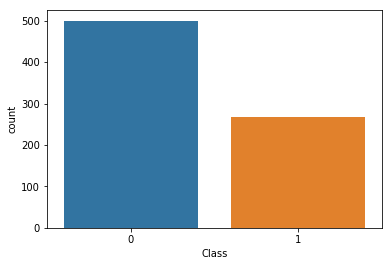

In [18]:
# Count Plot (a.k.a. Bar Plot)
import seaborn as sns
sns.countplot(x='Class', data=pima_df)
#plt.xticks(rotation=-45)

# The ratio is almost 1:2 in favor or status 0.  The model's ability to predict class 0 will 
# be better than predicting  1. 

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [21]:
pima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [ ]:
# Check data types and info of dataset

In [24]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Q3 Check data distribution using summary statistics and provide your findings

In [35]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


1) Pregnancies: As the 75% count is around 6 pregnancies we will need a Box Plot to determine whether 17 is an outlier as the STD is only 3.8

2) Glucose, BloodPressue, SkinThickenss Insulin BMI should not be zero we may need to look at a box plot to understand if they need to be worked on

3) BMI: Max BMI is 846 which seems to be a very high value compared to 75% of values we should inspect this using a box plot to ensure we fix any outliers


Pregnancies                     AxesSubplot(0.125,0.71587;0.227941x0.16413)
Glucose                      AxesSubplot(0.398529,0.71587;0.227941x0.16413)
BloodPressure                AxesSubplot(0.672059,0.71587;0.227941x0.16413)
SkinThickness                  AxesSubplot(0.125,0.518913;0.227941x0.16413)
Insulin                     AxesSubplot(0.398529,0.518913;0.227941x0.16413)
BMI                         AxesSubplot(0.672059,0.518913;0.227941x0.16413)
DiabetesPedigreeFunction       AxesSubplot(0.125,0.321957;0.227941x0.16413)
dtype: object

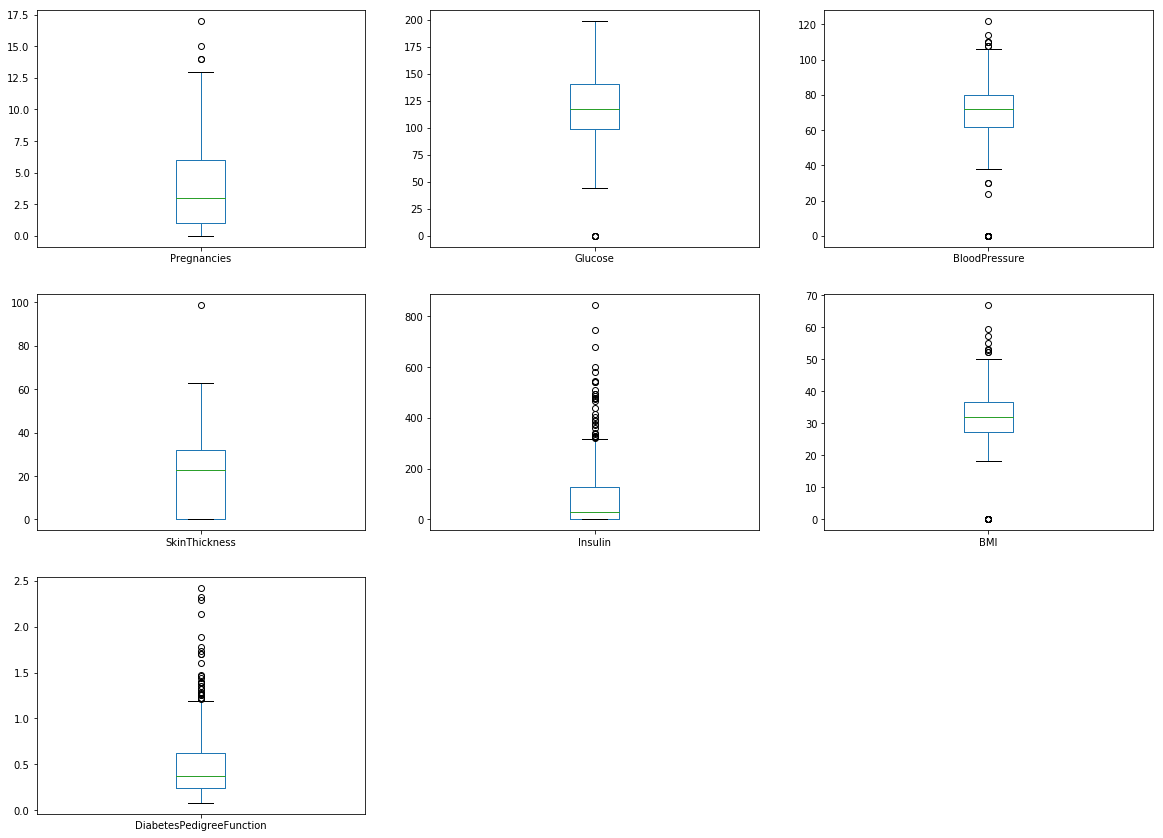

In [43]:
pima_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].plot(
    kind='box',subplots=True,layout=(4,3),figsize=(20,20))

We will not be removing Outliers as they may be used in prediction of Diabetes function

C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


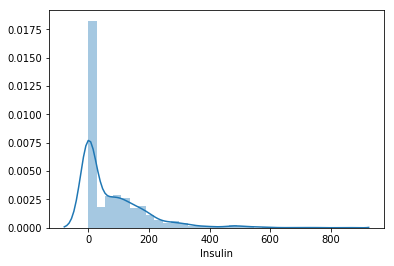

In [38]:
sns.distplot(pima_df.Insulin)

C:\Users\neeha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


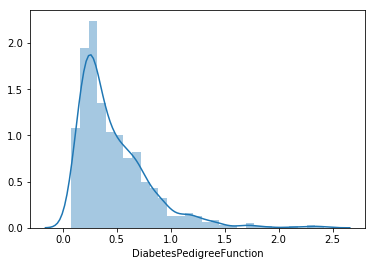

In [45]:
sns.distplot(pima_df.DiabetesPedigreeFunction)

This seems to be skewed to the right any we should check for the Max value as it seems to be too high. This may be one of the contributing features in predicting diabetes

## Q4 Do correlation analysis and bivariate viualization with Insights(1 Marks)

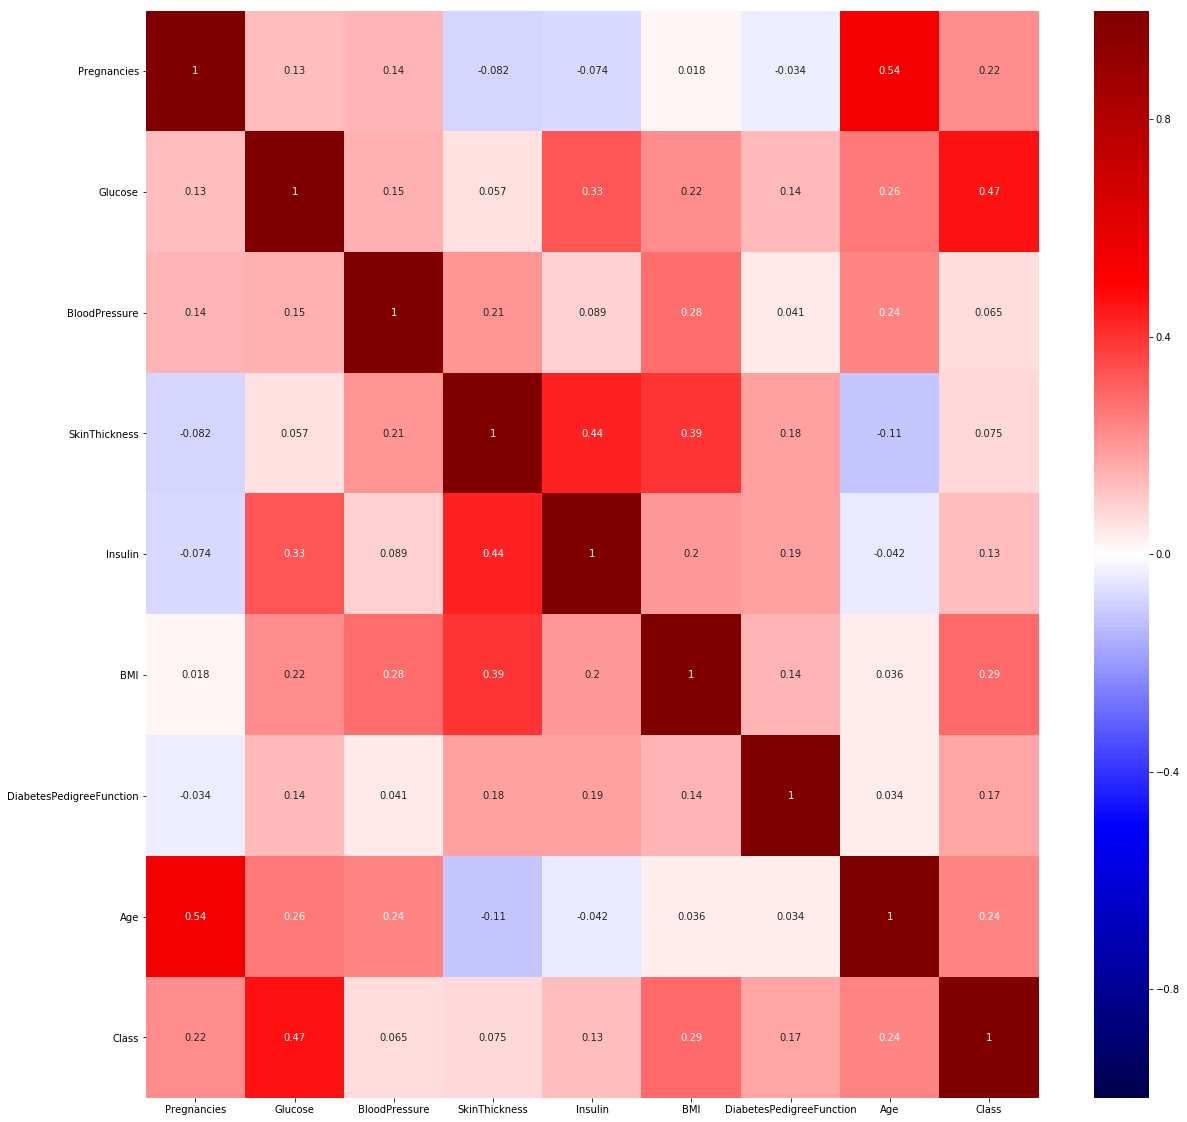

In [28]:
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(pima_df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [29]:
pima_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


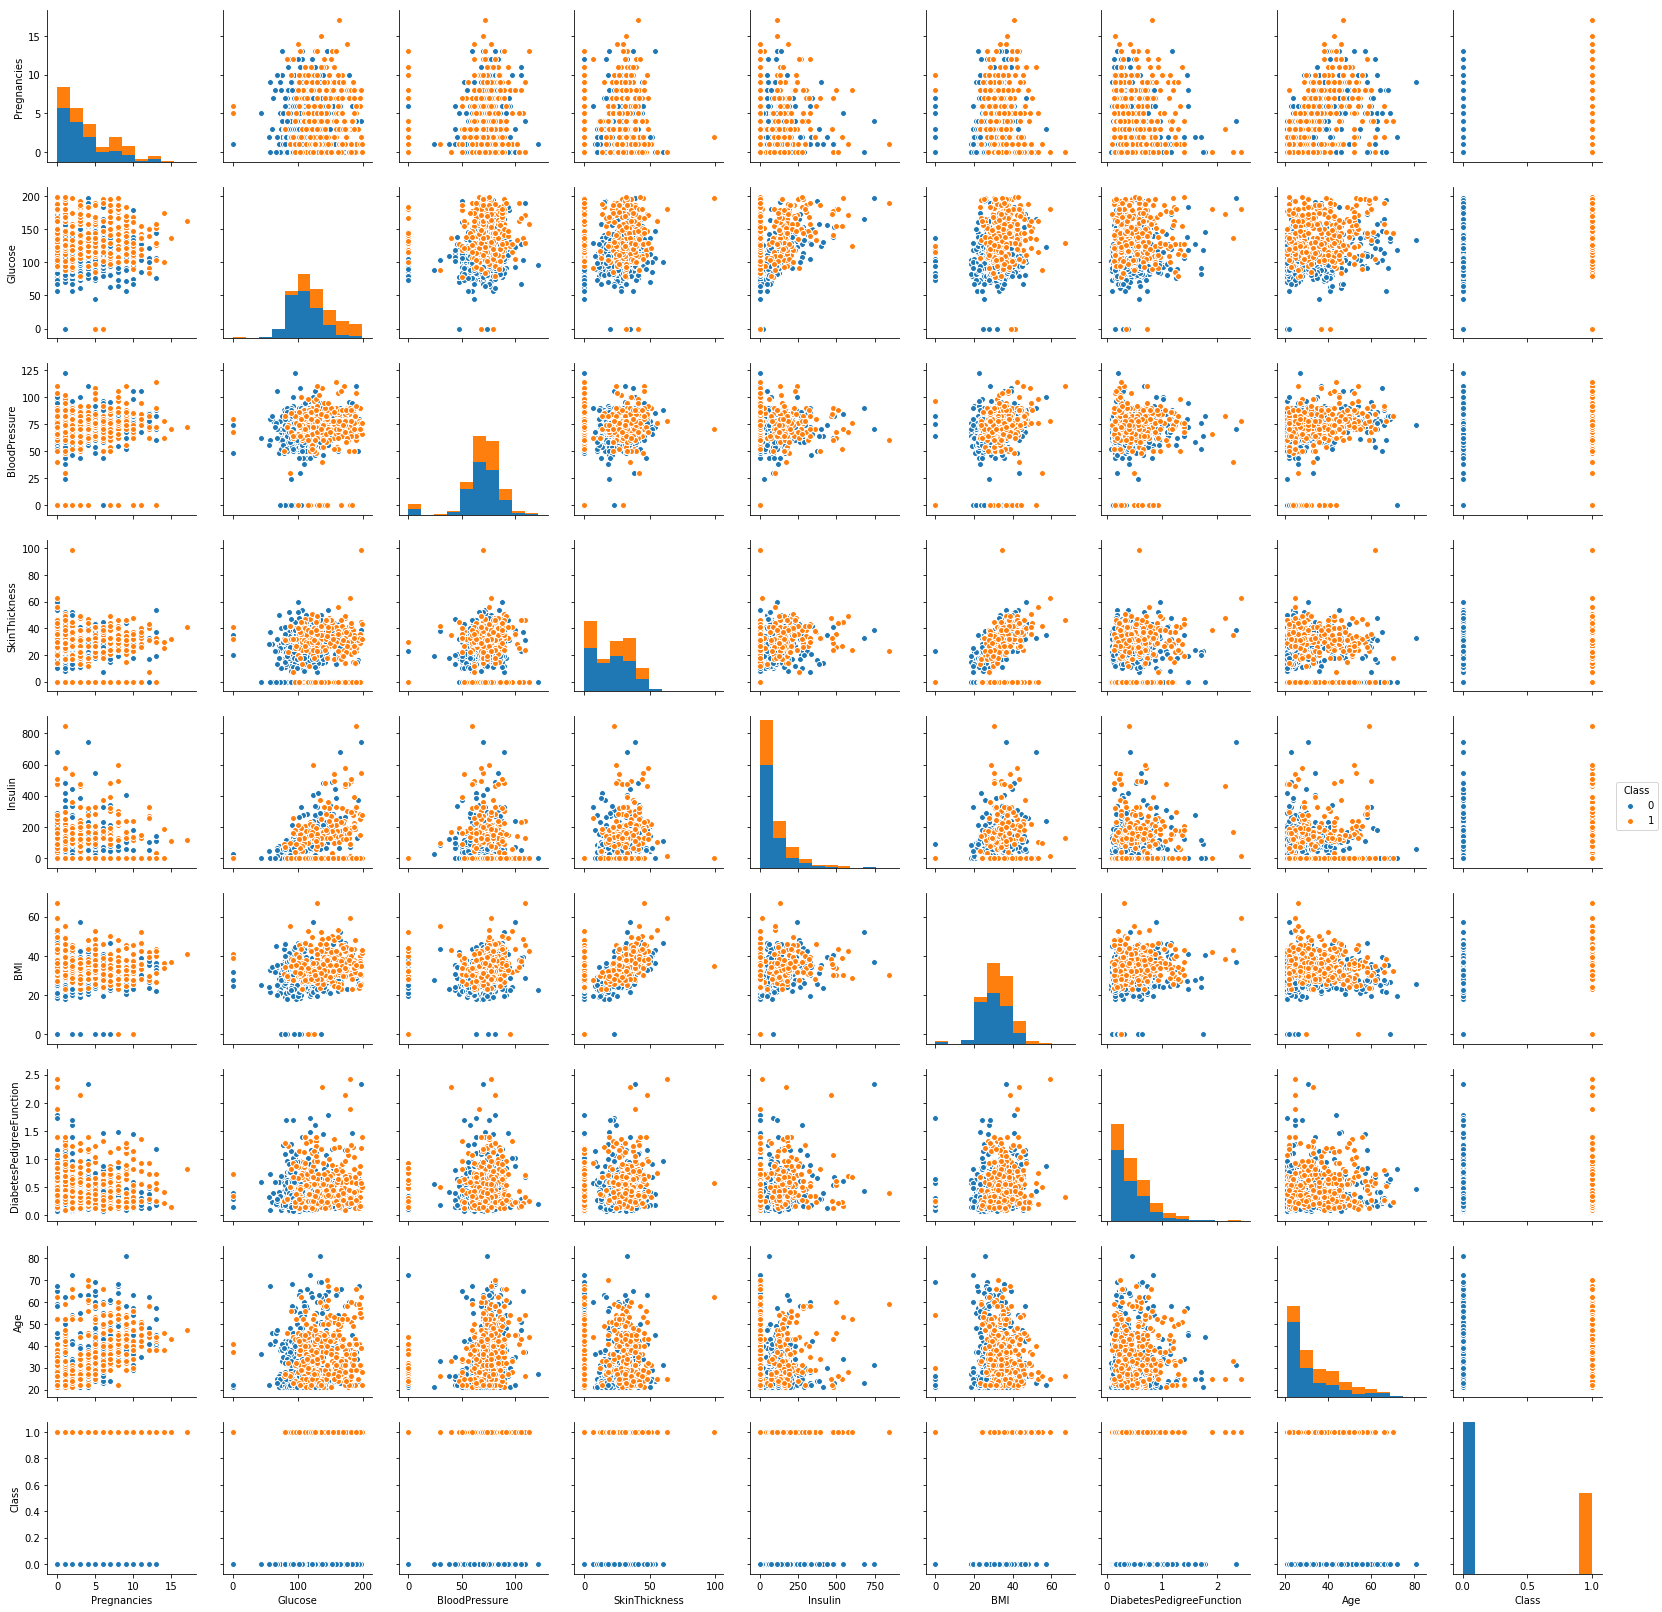

In [32]:
sns.pairplot(pima_df, hue='Class')

# 

Glucose has a high correlation with Diabetes (Glucose Increase with Diabetes)

Pregnancies has a high correlation with Age (Pregnancies Increase with Age)

Skin Thickness has a negative correlation with insulin (As skin thickness increases the insulin will reduce)

Glucose has a high correlation with Insulin (Glucose Increase leads to higher use of insulin )

Skin Thickness has a negative correlation with DiabetesPedgree Function

# Before Splitting the Data we need to ensure the 0 values are replaced with the Median values

In [51]:
x1=pima_df['Glucose'].median()
x2=pima_df['BloodPressure'].median()
x3=pima_df['SkinThickness'].median()
x4=pima_df['Insulin'].median()
x5=pima_df['BMI'].median()
x6=pima_df['DiabetesPedigreeFunction'].median()
pima_df['Glucose'].replace(to_replace=0, value=x1, inplace=True)
pima_df['BloodPressure'].replace(to_replace=0, value=x1, inplace=True)
pima_df['SkinThickness'].replace(to_replace=0, value=x1, inplace=True)
pima_df['Insulin'].replace(to_replace=0, value=x1, inplace=True)
pima_df['BMI'].replace(to_replace=0, value=x1, inplace=True)
pima_df['DiabetesPedigreeFunction'].replace(to_replace=0, value=x1, inplace=True)

In [52]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,74.437500,55.118490,136.776042,33.668359,0.471876,33.240885,0.348958
std,3.369578,30.438286,15.262202,41.062553,87.179770,12.178062,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,117.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,73.000000,35.000000,117.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,82.000000,117.000000,127.250000,36.825000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,117.000000,846.000000,117.000000,2.420000,81.000000,1.000000


#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

# As per the Lecture discussion we should split the data into 2 parts first before applying the min max scaler to ensure there is no data leak


In [200]:
pima_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [201]:
X_Test_Model=pima_df.drop('Class', axis = 1)
y_Test_Pred=pima_df['Class']

In [202]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_Test_Model, y_Test_Pred, test_size=0.30, random_state=17)

In [203]:
print(y_test.value_counts())
print(y_train.value_counts())

0    150
1     81
Name: Class, dtype: int64
0    350
1    187
Name: Class, dtype: int64


In [204]:
150/80

1.875

In [205]:
350/187

1.8716577540106951

 (y_train and y_test has the same proportion of Zeros and Ones approximately 2:1 in favour of Zeros

## Q5 Train Support Vector Machine Model(1 Marks)

In [206]:
# use from sklearn.svm import SVC

In [207]:
# your insights

In [208]:
from sklearn.svm import SVC
SVM=SVC()


In [209]:
SVM.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [210]:
y_pred=SVM.predict(x_test)

In [211]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [212]:

#print(classification_report(y_test, y_pred))
print(SVM.score(x_train,y_train))
print(SVM.score(x_test,y_test))

1.0
0.6493506493506493


In [213]:
pd.crosstab(y_test,y_pred)

col_0,0
Class,
0,150
1,81


Looks like a case of over fitting as the Training data has a very good score but the test results are very low

In [214]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.65      1.00      0.79       150
          1       0.00      0.00      0.00        81

avg / total       0.42      0.65      0.51       231



C:\Users\neeha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Q6 Scale the data points using MinMaxScaler ( 1 Marks)

In [215]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

x_train_sd=min_max.fit_transform(x_train)

x_test_sd=min_max.fit_transform(x_test)



In [216]:
x_test_sd

array([[0.        , 0.35915493, 0.32608696, ..., 0.08299595, 0.02097603,
        0.04166667],
       [0.69230769, 0.62676056, 0.63043478, ..., 0.12246964, 0.29409247,
        0.66666667],
       [0.30769231, 0.4084507 , 0.38043478, ..., 0.03744939, 0.1489726 ,
        0.33333333],
       ...,
       [0.38461538, 0.77464789, 0.45652174, ..., 0.07692308, 0.21532534,
        0.625     ],
       [0.        , 0.36619718, 0.41304348, ..., 0.09210526, 0.30094178,
        0.22916667],
       [0.15384615, 0.26056338, 0.36956522, ..., 0.20040486, 0.25256849,
        0.04166667]])

In [217]:
x_train_sd

array([[0.05882353, 0.41290323, 0.68817204, ..., 0.09008097, 0.14304753,
        0.05      ],
       [0.52941176, 0.51612903, 0.49462366, ..., 0.17408907, 0.09062639,
        0.21666667],
       [0.70588235, 0.49677419, 0.58064516, ..., 0.0840081 , 0.08040871,
        0.68333333],
       ...,
       [0.58823529, 0.41290323, 0.4516129 , ..., 0.1437247 , 0.08618392,
        0.35      ],
       [0.23529412, 0.30322581, 0.49462366, ..., 0.15080972, 0.1634829 ,
        0.01666667],
       [0.        , 0.32258065, 0.49462366, ..., 0.25607287, 0.11950244,
        0.        ]])

## Q7 Fit SVM Model on Scale data and give your observation( 1 Marks)

In [218]:
SVM.fit(x_train_sd,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [219]:
y_pred=SVM.predict(x_test_sd)

In [220]:

#print(classification_report(y_test, y_pred))
print(SVM.score(x_train_sd,y_train))
print(SVM.score(x_test_sd,y_test))

0.7690875232774674
0.7532467532467533


In [221]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Class,,
0,134,16
1,41,40


After Scaling the Attributes we see the Model accuracy in Both test and Train data are very close and has increased for the test data.Thus we have removed over fitted data

In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.89      0.82       150
          1       0.71      0.49      0.58        81

avg / total       0.75      0.75      0.74       231



#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [197]:
SVM=SVC(C=1000)
SVM.fit(x_train_sd,y_train)
y_pred=SVM.predict(x_test_sd)
print(SVM.score(x_train_sd,y_train))
print(SVM.score(x_test_sd,y_test))

0.8100558659217877
0.7619047619047619


In [198]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Class,,
0,126,24
1,31,50


In [199]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.84      0.82       150
          1       0.68      0.62      0.65        81

avg / total       0.76      0.76      0.76       231



# Accuracy improved from 75% to 76% We are now able to predict the Diabetes Better As Precision, Recall and F1 score has increased

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [223]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [224]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [225]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [226]:
gs.fit(x_train_sd, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [227]:
gs.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [228]:
gs.best_score_ 

0.7690875232774674

In [230]:
SVM_Best=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [231]:
SVM_Best.fit(x_train_sd,y_train)
y_pred=SVM_Best.predict(x_test_sd)
print(SVM_Best.score(x_train_sd,y_train))
print(SVM_Best.score(x_test_sd,y_test))

0.7690875232774674
0.7532467532467533


In [232]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Class,,
0,134,16
1,41,40


In [233]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.89      0.82       150
          1       0.71      0.49      0.58        81

avg / total       0.75      0.75      0.74       231

